In [81]:
import altair as alt
import pandas as pd


In [51]:
datos = pd.read_csv("../datos/procesados/migrante_por_año_por_pais.csv")

In [52]:
datos.columns = ['país', 'año', 'factor']

In [53]:
datos.head()

,país,año,factor
0,ARGENTINA,2014,111
1,ARGENTINA,2015,791
2,ARGENTINA,2016,883
3,ARGENTINA,2017,832
4,ARGENTINA,2018,917


In [54]:
datos = datos[datos['año'] <= 2018]

In [74]:
datos['país'] = (
    datos['país'].str.strip()
    .str.replace("REPUBLICA DE ", "")
    .str.replace("REPUBLICA FEDERATIVA DE ", "")
    .str.replace("REINO DE ", "")
    .str.replace("ESTADO DE ", "")
    .str.replace("COMMONWEALTH DE ", "")
    .str.replace("REPUBLICA FEDERAL DE ", "")
    .str.replace("REPUBLICA POPULAR ", "")
    .str.replace("REPUBLICA FRANCESA", "FRANCIA")
    .str.replace("REPUBLICA PORTUGUESA", "PORTUGAL")
    .str.replace("REPUBLICA ITALIANA", "ITALIA")
    .str.replace("FEDERACION DE ", "")
    .str.replace("REPUBLICA DEL ", "")
    .str.replace("REPUBLICA LIBANESA", "LIBANO")
    .str.replace("REINO UNIDO DE GRAN BRETAÑA E IRLANDA", "REINO UNIDO")
)

In [75]:
datos['país'].value_counts()

ESPAÑA                       6
ESTADOS UNIDOS DE AMERICA    6
ALEMANIA                     6
CANADA                       6
REINO UNIDO                  5
CHINA                        5
ARGENTINA                    5
BRASIL                       5
FRANCIA                      4
COLOMBIA                     4
ITALIA                       3
EUROPA                       3
TAILANDIA                    3
EMIRATOS ARABES UNIDOS       3
PANAMA                       3
PAIS NO ESPECIFICADO         3
PORTUGAL                     2
NUEVA ZELANDA                2
ISRAEL                       2
CUBA                         2
PERU                         2
NICARAGUA                    2
GUATEMALA                    2
AUSTRALIA                    2
RUMANIA                      1
HONDURAS                     1
KENIA                        1
BELGICA                      1
KAZAJSTAN                    1
AUSTRIA                      1
UCRANIA                      1
JAPON                        1
BELICE  

In [83]:
%run tema

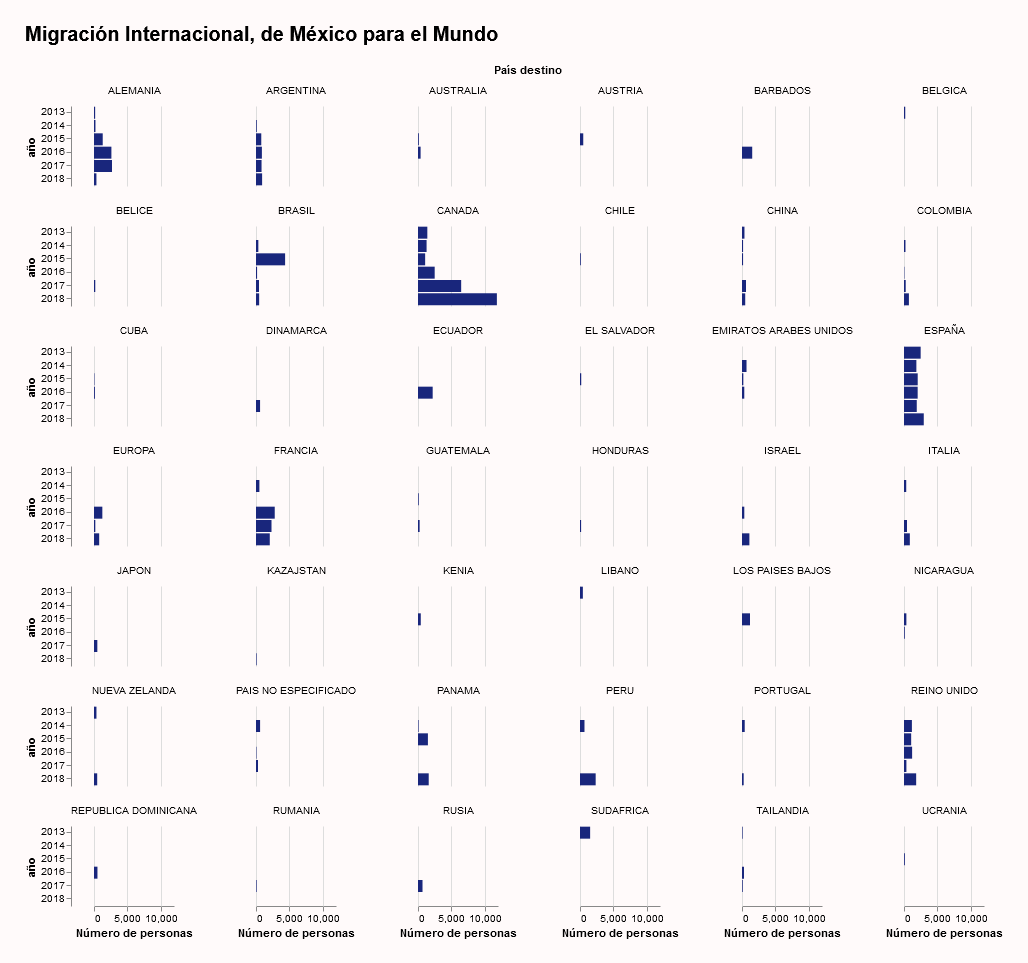

In [93]:
alt.Chart(datos[datos['país'] != 'ESTADOS UNIDOS DE AMERICA']).mark_bar(color = "#19267c").encode(
    x = alt.X('sum(factor)', title = 'Número de personas'),
    y = alt.Y('año:N'),
#     color = alt.Color('año:N'),
    facet = alt.Facet("país:N", title = "País destino")
).properties(
    title = "Migración Internacional, de México para el Mundo",
    columns = 6,
    width = 80,
    height = 80,
)